<a href="https://www.kaggle.com/code/shruthiiiee/house-price-prediction?scriptVersionId=138356538" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/california-housing-prices/housing.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('../input/california-housing-prices/housing.csv')

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [9]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
train_data=X_train.join(y_train)

In [13]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5118,-118.28,33.97,34.0,2771.0,802.0,2782.0,715.0,1.6652,<1H OCEAN,99000.0
6682,-118.09,34.15,49.0,1467.0,259.0,688.0,260.0,4.3452,INLAND,260100.0
16184,-121.29,37.95,16.0,761.0,306.0,438.0,282.0,0.7714,INLAND,87500.0
8770,-118.34,33.79,36.0,716.0,123.0,388.0,124.0,5.0254,<1H OCEAN,350000.0
19413,-121.01,37.72,23.0,1373.0,264.0,677.0,245.0,2.5486,INLAND,161100.0
...,...,...,...,...,...,...,...,...,...,...
8657,-118.38,33.85,31.0,3533.0,729.0,1647.0,679.0,5.5843,<1H OCEAN,384600.0
8419,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,<1H OCEAN,155700.0
7821,-118.12,33.91,36.0,1432.0,265.0,749.0,261.0,3.5772,<1H OCEAN,207400.0
930,-122.04,37.55,23.0,3170.0,532.0,1446.0,515.0,4.4357,NEAR BAY,291700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

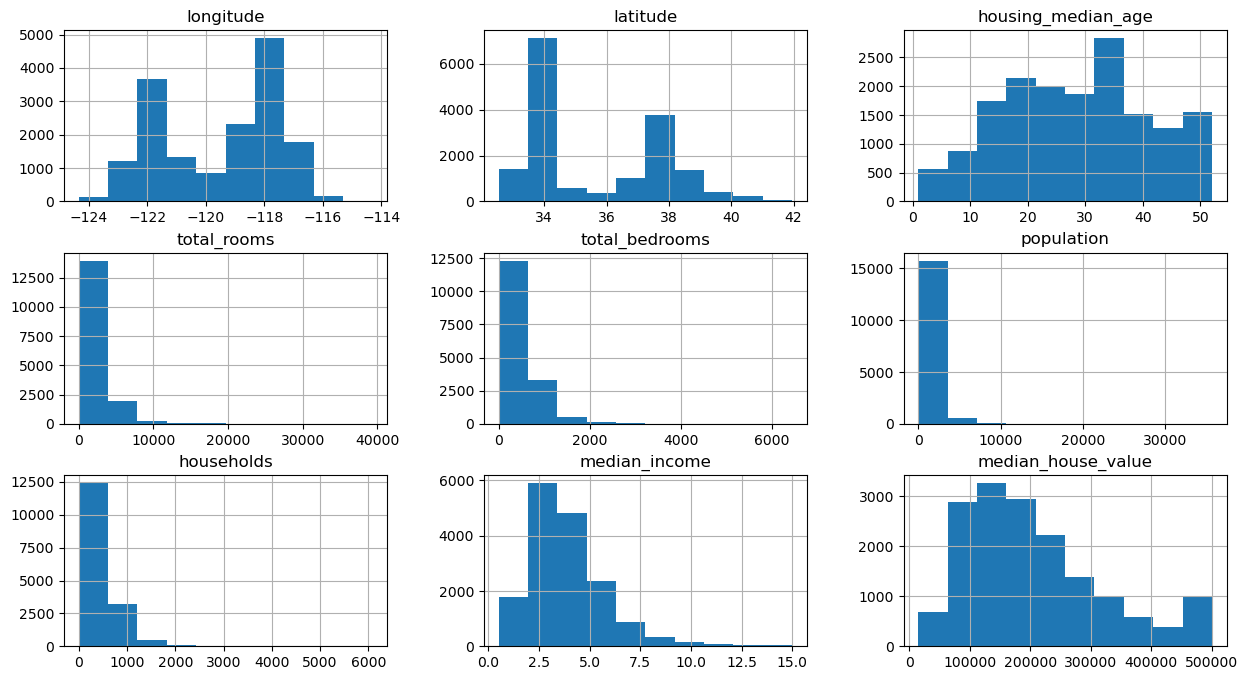

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
train_data.corr()

/tmp/ipykernel_20/1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924491,-0.107291,0.047072,0.071249,0.100883,0.056265,-0.016242,-0.047674
latitude,-0.924491,1.000000,0.008571,-0.037897,-0.067711,-0.108937,-0.071387,-0.078996,-0.142977
housing_median_age,-0.107291,0.008571,1.000000,-0.357552,-0.315184,-0.292083,-0.297254,-0.116379,0.108382
total_rooms,0.047072,-0.037897,-0.357552,1.000000,0.930614,0.855566,0.918456,0.196229,0.134005
total_bedrooms,0.071249,-0.067711,-0.315184,0.930614,1.000000,0.876556,0.978459,-0.010732,0.048724
population,0.100883,-0.108937,-0.292083,0.855566,0.876556,1.000000,0.907569,0.000170,-0.026813
households,0.056265,-0.071387,-0.297254,0.918456,0.978459,0.907569,1.000000,0.010320,0.064123
median_income,-0.016242,-0.078996,-0.116379,0.196229,-0.010732,0.000170,0.010320,1.000000,0.691816
median_house_value,-0.047674,-0.142977,0.108382,0.134005,0.048724,-0.026813,0.064123,0.691816,1.000000


/tmp/ipykernel_20/842231939.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap='YlGnBu')


<Axes: >

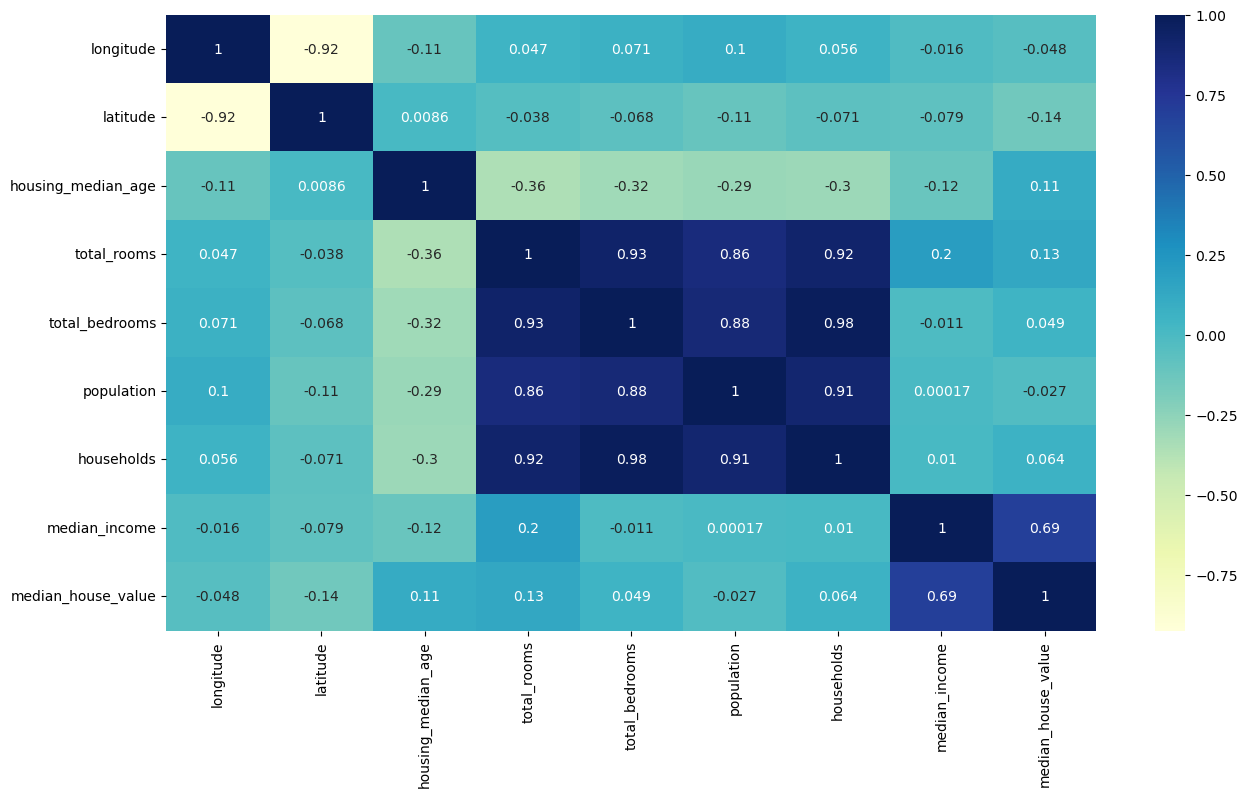

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap='YlGnBu')

In [17]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

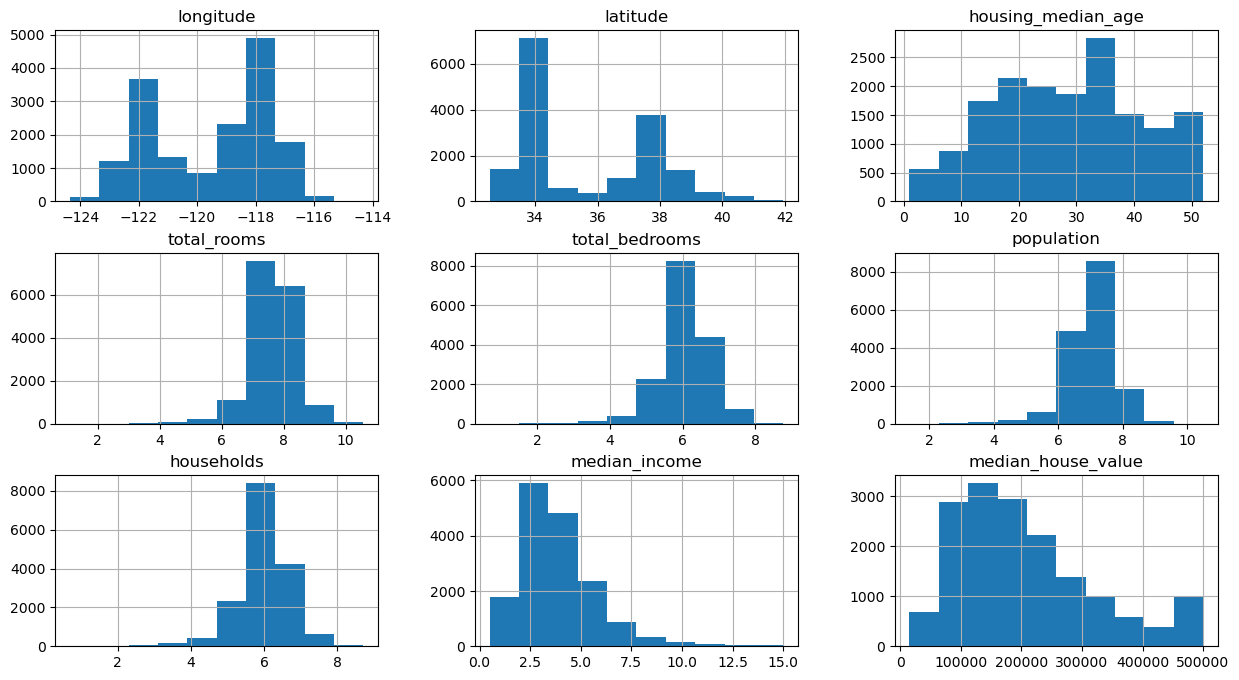

In [18]:
train_data.hist(figsize=(15,8))

In [19]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7209
INLAND        5202
NEAR OCEAN    2085
NEAR BAY      1846
ISLAND           4
Name: ocean_proximity, dtype: int64

In [20]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [21]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5118,-118.28,33.97,34.0,7.927324,6.688355,7.931285,6.573680,1.6652,99000.0,1,0,0,0,0
6682,-118.09,34.15,49.0,7.291656,5.560682,6.535241,5.564520,4.3452,260100.0,0,1,0,0,0
16184,-121.29,37.95,16.0,6.635947,5.726848,6.084499,5.645447,0.7714,87500.0,0,1,0,0,0
8770,-118.34,33.79,36.0,6.575076,4.820282,5.963579,4.828314,5.0254,350000.0,1,0,0,0,0
19413,-121.01,37.72,23.0,7.225481,5.579730,6.519147,5.505332,2.5486,161100.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8657,-118.38,33.85,31.0,8.170186,6.593045,7.407318,6.522093,5.5843,384600.0,1,0,0,0,0
8419,-118.34,33.93,32.0,7.134891,5.991465,7.156177,5.958425,2.2976,155700.0,1,0,0,0,0
7821,-118.12,33.91,36.0,7.267525,5.583496,6.620073,5.568345,3.5772,207400.0,1,0,0,0,0
930,-122.04,37.55,23.0,8.061802,6.278521,7.277248,6.246107,4.4357,291700.0,0,0,0,1,0


<Axes: >

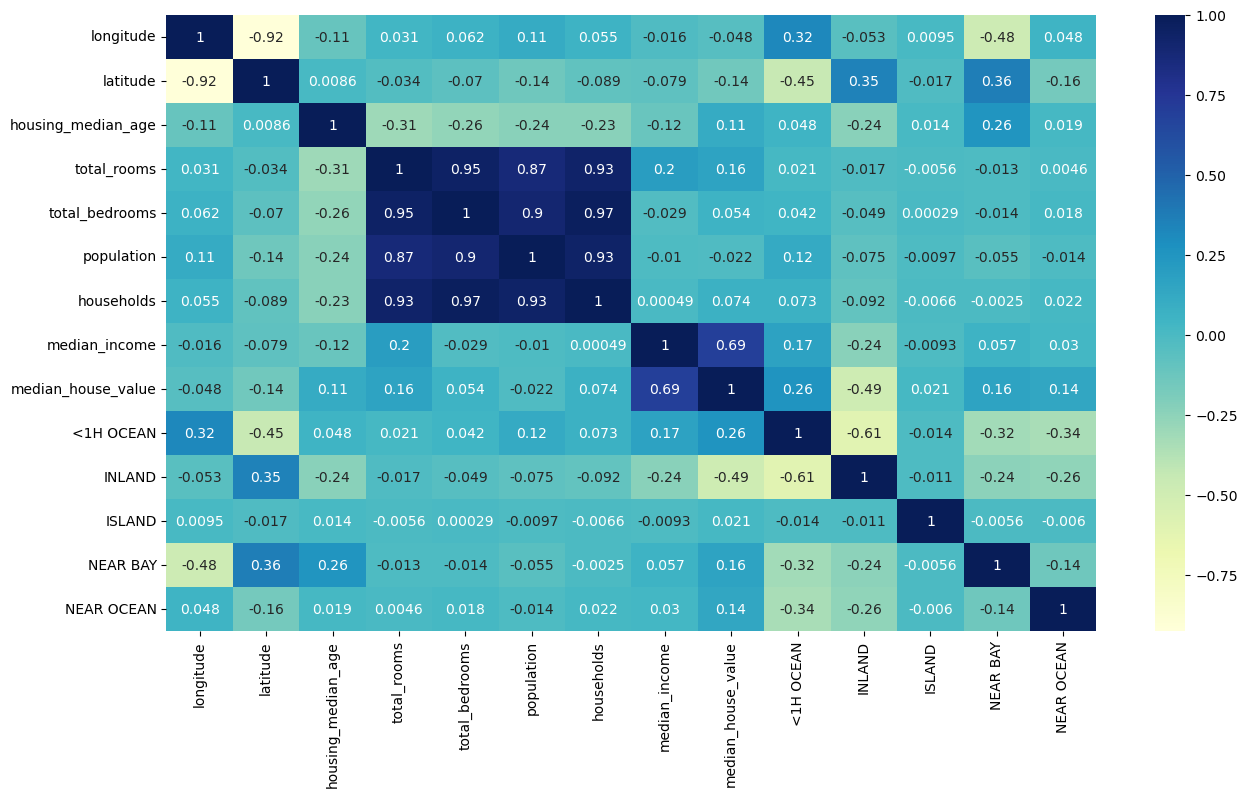

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

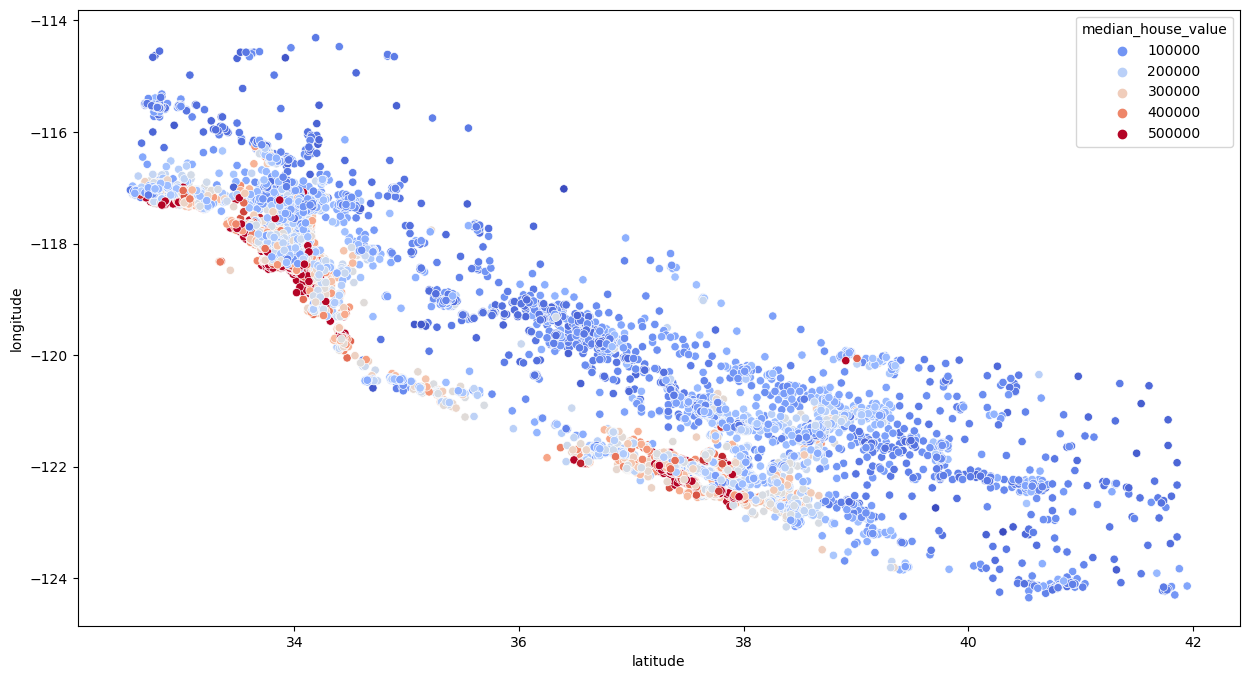

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value",palette="coolwarm")

In [24]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

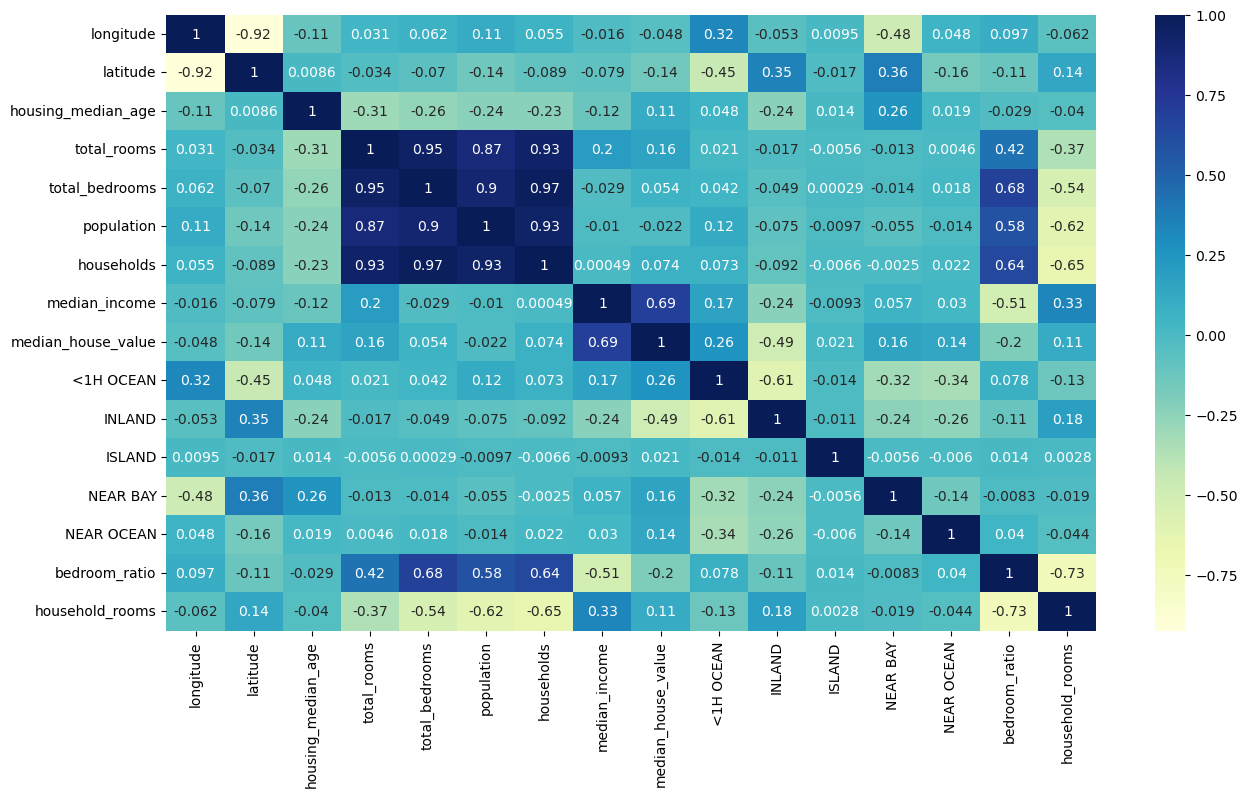

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap='YlGnBu')

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train,y_train=train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']
X_test,y_test=test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [28]:
X_test_s=scaler.transform(X_test)

In [29]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
5118,-118.28,33.97,34.0,7.927324,6.688355,7.931285,6.573680,1.6652,99000.0,1,0,0,0,0,0.843709,1.205919
6682,-118.09,34.15,49.0,7.291656,5.560682,6.535241,5.564520,4.3452,260100.0,0,1,0,0,0,0.762609,1.310384
16184,-121.29,37.95,16.0,6.635947,5.726848,6.084499,5.645447,0.7714,87500.0,0,1,0,0,0,0.863004,1.175451
8770,-118.34,33.79,36.0,6.575076,4.820282,5.963579,4.828314,5.0254,350000.0,1,0,0,0,0,0.733114,1.361775
19413,-121.01,37.72,23.0,7.225481,5.579730,6.519147,5.505332,2.5486,161100.0,0,1,0,0,0,0.772229,1.312452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8657,-118.38,33.85,31.0,8.170186,6.593045,7.407318,6.522093,5.5843,384600.0,1,0,0,0,0,0.806964,1.252694
8419,-118.34,33.93,32.0,7.134891,5.991465,7.156177,5.958425,2.2976,155700.0,1,0,0,0,0,0.839742,1.197446
7821,-118.12,33.91,36.0,7.267525,5.583496,6.620073,5.568345,3.5772,207400.0,1,0,0,0,0,0.768280,1.305150
930,-122.04,37.55,23.0,8.061802,6.278521,7.277248,6.246107,4.4357,291700.0,0,0,0,1,0,0.778799,1.290692


In [30]:
reg.score(X_test, y_test)

0.646970964107033

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [32]:
forest.score(X_test_s,y_test)

0.7998352751258215

In [33]:
from sklearn.model_selection import GridSearchCV
foret = RandomForestRegressor()
param_grid = {
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]
}
grid_search=GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200)

In [35]:
grid_search.best_estimator_.score(X_test_s,y_test)

0.8019529429806269